In [1]:
import pandas as pd                # Importing pandas
import numpy as np                 # Importing numpy
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns              # Importing seaborn for visualization
!pip install folium                # Installing folium library

In [2]:
#Importing Dataset
df = pd.read_excel("Restaurant_sourcedata.xlsx")
df.head(2)

RestaurantID       RestaurantName  CountryCode       City  \
0      18435314  Punjabi's Veg Grill            1  New Delhi   
1      18378015        Tasty Tandoor            1  New Delhi   

                                             Address      Locality  \
0  13/288 , 14 Block Gurudwra, Geeta Colony, New ...  Geeta Colony   
1     726/2, Jheel Khuranja, Geeta Colony, New Delhi  Geeta Colony   

           LocalityVerbose  Longitude   Latitude      Cuisines  ...  \
0  Geeta Colony, New Delhi  77.276769  28.650775  North Indian  ...   
1  Geeta Colony, New Delhi  77.275052  28.658216  North Indian  ...   

  Is_delivering_now Switch_to_order_menu Price_range No_of_people_rated  \
0                No                   No           1                  0   
1                No                   No           1                  0   

  Average_Cost_for_two  Rating  Datekey_Opening    Cuisines 1  Cuisines 2  \
0                  300     1.0        2013_9_21  North Indian         NaN   
1                  200     1.0        2016_9_10  North Indian         NaN   

  Country  
0   India  
1   India  

[2 rows x 23 columns]

In [3]:
# fetching the last two columns
df.tail(2)

RestaurantID             RestaurantName  CountryCode       City  \
9549         94286  AB's - Absolute Barbecues            1  Hyderabad   
9550         20842            Barbeque Nation            1    Kolkata   

                                                Address             Locality  \
9549  Plot 483, 4th Floor, Pemmasani Complex, Bajaj ...        Jubilee Hills   
9550  K1, RDB Boulevard, Block EP & GP, Sector 5, Sa...  Sector 5, Salt Lake   

                   LocalityVerbose  Longitude   Latitude  \
9549      Jubilee Hills, Hyderabad  78.397865  17.438263   
9550  Sector 5, Salt Lake, Kolkata  88.433452  22.569358   

                                   Cuisines  ... Is_delivering_now  \
9549  European, Mediterranean, North Indian  ...                No   
9550                  North Indian, Chinese  ...                No   

     Switch_to_order_menu Price_range No_of_people_rated Average_Cost_for_two  \
9549                   No           3               5434                 1500   
9550                   No           3               5966                 1600   

      Rating  Datekey_Opening  Cuisines 1   Cuisines 2 Country  
9549     4.9       2017_10_14        Cafe   Sri Lankan   India  
9550     4.9        2015_3_16        Cafe          NaN   India  

[2 rows x 23 columns]

In [4]:
df.shape

(9551, 23)

In [5]:
# Viewing the information of Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   RestaurantID          9551 non-null   int64  
 1   RestaurantName        9551 non-null   object 
 2   CountryCode           9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   LocalityVerbose       9551 non-null   object 
 7   Longitude             9053 non-null   float64
 8   Latitude              9053 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Currency              9551 non-null   object 
 11  Has_Table_booking     9551 non-null   object 
 12  Has_Online_delivery   9551 non-null   object 
 13  Is_delivering_now     9551 non-null   object 
 14  Switch_to_order_menu  9551 non-null   object 
 15  Price_range          

In [6]:
#Calculated Column

# Extract the first four characters (year) from the 'Datekey_Opening' column and update the DataFrame
# Assuming 'Datekey_Opening' is in the 'YYYY-MM-DD' format
df['Datekey_Opening'] = df['Datekey_Opening'].str[0:4]

# Get the current date in string format
present = np.datetime64('today').astype(str)

# Extract the first four characters (year) from the current date
pyear = present[0:4]

# Calculate the total years by subtracting the opening year from the present year
df['Years_in_Business'] = int(pyear) - df['Datekey_Opening'].astype(int)

# Display the 'RestaurantName' and 'Total_Years' columns
output_df = df[['RestaurantName', 'Years_in_Business']]

# Print the heading for the output

df.head(2)

RestaurantID       RestaurantName  CountryCode       City  \
0      18435314  Punjabi's Veg Grill            1  New Delhi   
1      18378015        Tasty Tandoor            1  New Delhi   

                                             Address      Locality  \
0  13/288 , 14 Block Gurudwra, Geeta Colony, New ...  Geeta Colony   
1     726/2, Jheel Khuranja, Geeta Colony, New Delhi  Geeta Colony   

           LocalityVerbose  Longitude   Latitude      Cuisines  ...  \
0  Geeta Colony, New Delhi  77.276769  28.650775  North Indian  ...   
1  Geeta Colony, New Delhi  77.275052  28.658216  North Indian  ...   

  Switch_to_order_menu Price_range No_of_people_rated Average_Cost_for_two  \
0                   No           1                  0                  300   
1                   No           1                  0                  200   

  Rating  Datekey_Opening    Cuisines 1  Cuisines 2  Country Years_in_Business  
0    1.0             2013  North Indian         NaN    India                10  
1    1.0             2016  North Indian         NaN    India                 7  

[2 rows x 24 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   RestaurantID          9551 non-null   int64  
 1   RestaurantName        9551 non-null   object 
 2   CountryCode           9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   LocalityVerbose       9551 non-null   object 
 7   Longitude             9053 non-null   float64
 8   Latitude              9053 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Currency              9551 non-null   object 
 11  Has_Table_booking     9551 non-null   object 
 12  Has_Online_delivery   9551 non-null   object 
 13  Is_delivering_now     9551 non-null   object 
 14  Switch_to_order_menu  9551 non-null   object 
 15  Price_range          

In [8]:
#Importing Restaurant_Rating dataset
df1= pd.read_excel("Restaurant__Ratings.xlsx")
df1.head(3)

Rating Color  Text
0     1.0   Red  Poor
1     1.1   Red  Poor
2     1.2   Red  Poor

In [9]:
#Adding column to a dataset

# Merging df and df1
final_df = pd.merge(df,df1,on='Rating',how='left')
final_df.head(2)

RestaurantID       RestaurantName  CountryCode       City  \
0      18435314  Punjabi's Veg Grill            1  New Delhi   
1      18378015        Tasty Tandoor            1  New Delhi   

                                             Address      Locality  \
0  13/288 , 14 Block Gurudwra, Geeta Colony, New ...  Geeta Colony   
1     726/2, Jheel Khuranja, Geeta Colony, New Delhi  Geeta Colony   

           LocalityVerbose  Longitude   Latitude      Cuisines  ...  \
0  Geeta Colony, New Delhi  77.276769  28.650775  North Indian  ...   
1  Geeta Colony, New Delhi  77.275052  28.658216  North Indian  ...   

  No_of_people_rated Average_Cost_for_two Rating Datekey_Opening  \
0                  0                  300    1.0            2013   
1                  0                  200    1.0            2016   

     Cuisines 1  Cuisines 2  Country  Years_in_Business  Color  Text  
0  North Indian         NaN    India                 10    Red  Poor  
1  North Indian         NaN    India                  7    Red  Poor  

[2 rows x 26 columns]

In [10]:
#Information of each column
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   RestaurantID          9551 non-null   int64  
 1   RestaurantName        9551 non-null   object 
 2   CountryCode           9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   LocalityVerbose       9551 non-null   object 
 7   Longitude             9053 non-null   float64
 8   Latitude              9053 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Currency              9551 non-null   object 
 11  Has_Table_booking     9551 non-null   object 
 12  Has_Online_delivery   9551 non-null   object 
 13  Is_delivering_now     9551 non-null   object 
 14  Switch_to_order_menu  9551 non-null   object 
 15  Price_range          

In [11]:
#Count of Null Values
df.isnull().sum()

RestaurantID               0
RestaurantName             0
CountryCode                0
City                       0
Address                    0
Locality                   0
LocalityVerbose            0
Longitude                498
Latitude                 498
Cuisines                   9
Currency                   0
Has_Table_booking          0
Has_Online_delivery        0
Is_delivering_now          0
Switch_to_order_menu       0
Price_range                0
No_of_people_rated         0
Average_Cost_for_two       0
Rating                     0
Datekey_Opening            0
Cuisines 1                 9
Cuisines 2              3403
Country                    0
Years_in_Business          0
dtype: int64

In [12]:
# Q-1: No.of Restaurants in each country

print("No.of restaurants in each country")
final_df.Country.value_counts()

No.of restaurants in each country


India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Sri Lanka           20
Singapore           20
Qatar               20
Canada               4
Name: Country, dtype: int64

* Business Recommendation: 

    As India has maximum number of resturants,and market demand is high,its suggestable to open a restaurant in India.


In [14]:
#Q-2: Count of restaurants based on City and Locality in India.

# Find the city with the highest number of restaurants
most_restaurants_city = final_df[final_df['Country'] == 'India']['City'].value_counts().idxmax()

# Filter the DataFrame for the chosen city
city_df = final_df[final_df['City'] == most_restaurants_city]
print(f"Highest Number of Restaurants are in {most_restaurants_city}: {len(city_df)}")

# Print the count of restaurants as per locality in the chosen city
locality_counts = final_df['Locality'].value_counts()
print(f"\nNumber of Restaurants in" ,most_restaurants_city ,"Locality:")
print(locality_counts)



Highest Number of Restaurants are in New Delhi: 5473

Number of Restaurants in New Delhi Locality:
Connaught Place                    122
Rajouri Garden                      99
Shahdara                            87
Defence Colony                      86
Pitampura                           85
                                  ... 
Middleton Beach                      1
Radisson Blu Hotel, Vijay Nagar      1
Halwan Suburb                        1
Al Muntazah                          1
Pondok Aren                          1
Name: Locality, Length: 1208, dtype: int64


* Business Recommendation:
    As highest number of Restaurants are in New Delhi,start the Restaurant in New Delhi City.

In [15]:
# Q-3: Density of Restaurants in New Delhi

import folium
from folium.plugins import MarkerCluster

#In India particulary in Delhi
final_df_delhi = final_df[final_df['City'] == 'New Delhi']

# Assuming your Latitude and Longitude columns have NaN values for missing data
final_df_delhi_cleaned= final_df_delhi.dropna(subset=['Latitude', 'Longitude'])

locality_verbose = final_df_delhi_cleaned['City']
latitude = final_df_delhi_cleaned['Latitude']
longitude = final_df_delhi_cleaned['Longitude']

# Check if there are still rows with missing Latitude or Longitude
#if latitude.isnull().any() or longitude.isnull().any():
    #print("Warning: There are still missing values in Latitude or Longitude columns.")

# Create a folium map centered around the mean coordinates
mean_latitude = latitude.mean()
mean_longitude = longitude.mean()
my_map = folium.Map(location=[mean_latitude, mean_longitude], zoom_start=12)

# Create a MarkerCluster for efficient rendering of many markers
marker_cluster = MarkerCluster().add_to(my_map)

# Add markers to the map
for loc, lat, lon in zip(locality_verbose, latitude, longitude):
    folium.Marker(location=[lat, lon], popup=loc).add_to(marker_cluster)


# Display the map
my_map



* Business Recommendation:
  
  Opt for initiating a restaurant in the North-East region, where the number of restaurants is comparatively lower, offering a reduced level of competition

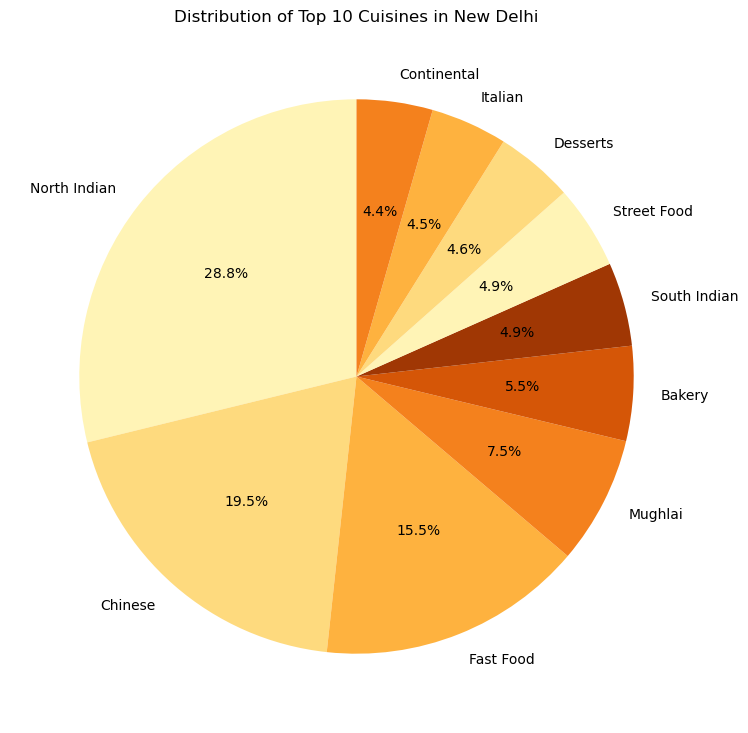

In [16]:
#Q-4: Top 10 Cuisines in New Delhi

import matplotlib.pyplot as plt
import seaborn as sns

#In India particulary in Delhi
final_df_delhi = final_df[final_df['City'] == 'New Delhi']

delhi_cuisines_series = final_df_delhi[final_df_delhi['City'] == 'New Delhi']['Cuisines']

# Splitting and flattening the list of cuisines
all_delhi_cuisines = [cuisine for cuisines in delhi_cuisines_series.dropna() for cuisine in cuisines.split(', ')]

# Counting the occurrences of each cuisine
cuisine_counts = pd.Series(all_delhi_cuisines).value_counts()

# Selecting only the top 10 cuisines
top_10_cuisines = cuisine_counts.head(10)

# Visualizing the distribution of the top 10 cuisines with a pie chart
plt.figure(figsize=(10, 9))
plt.pie(top_10_cuisines, labels=top_10_cuisines.index, autopct='%1.1f%%', colors=sns.color_palette('YlOrBr'), startangle=90)
plt.title('Distribution of Top 10 Cuisines in New Delhi')
plt.show()


* Business Recommendation:

    Considering that the top three cuisines are North Indian, Chinese, and Fastfood, the focus should be on offering a Fusion Cuisine, specifically an Indian-Chinese fusion.


In [17]:
#Q-5: Insights on rating distribution

# Group the final_df DataFrame by the columns 'Rating', 'Color', and 'Text',
# Count the occurrences of each unique combination, and reset the index.

final_df = final_df[final_df['City'] == 'New Delhi']
ratings = final_df.groupby(['Rating','Color','Text']).size().reset_index().rename(columns={0: 'Rating Count'})
ratings.head(5)

Rating Color  Text  Rating Count
0     1.0   Red  Poor          1425
1     1.9   Red  Poor             2
2     2.0   Red  Poor             2
3     2.1   Red  Poor             8
4     2.2   Red  Poor            14

<Axes: xlabel='Rating', ylabel='Rating Count'>

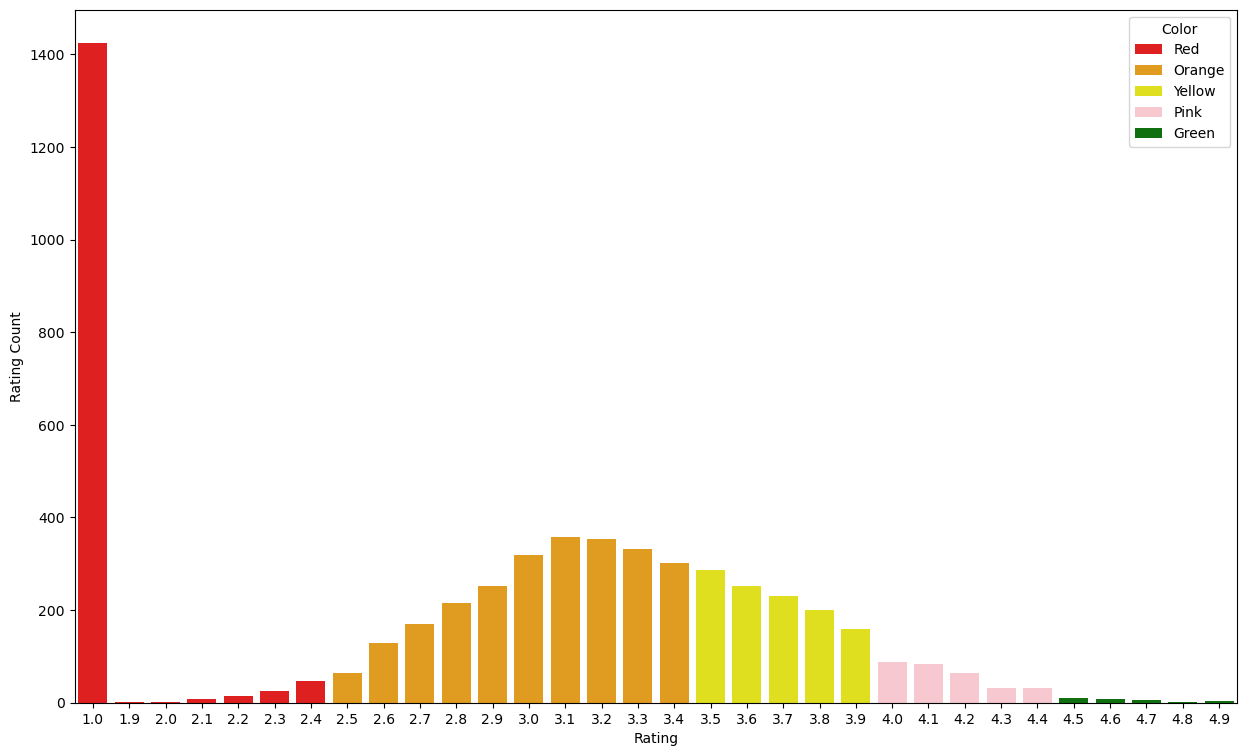

In [19]:
# Q-5(contd): Set the default figure size for matplotlib plots to (10,10).
matplotlib.rcParams['figure.figsize'] = (15, 9)

# Create a grouped bar plot using Seaborn.
sns.barplot(x="Rating", y='Rating Count', hue='Color', data=ratings,
            palette=['red', 'orange', 'yellow', 'pink', 'green'], dodge=False)

* Business Recommendation:
    Few restaurants with ratings above 4 exist, hence sustainable in market done through maintaining excellent food quality.
    

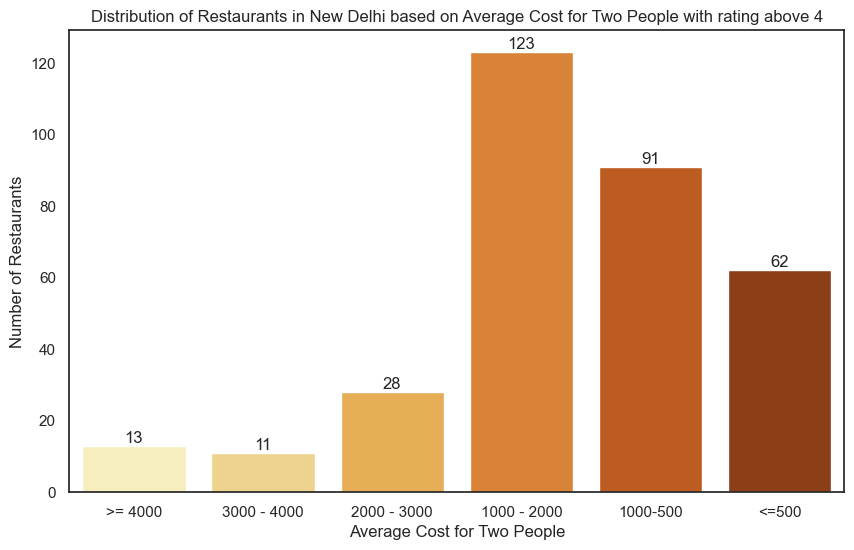

In [131]:
#Q-6: Average cost for two with rating more than 4

# Filter data for New Delhi in India
final_df_delhi = final_df[final_df['City'] == 'New Delhi']

# Function to filter restaurants based on cost and rating
def filter_restaurants(dataframe, min_cost, max_cost, min_rating):
    return dataframe[(dataframe['Average_Cost_for_two'] >= min_cost) &
                     (dataframe['Average_Cost_for_two'] < max_cost) &
                     (dataframe['Rating'] >= min_rating)]

# Function to count restaurants in different cost ranges
def count_restaurants_in_cost_ranges(final_df_delhi, cost_ranges, rating_threshold):
    counts = []
    for cost_range in cost_ranges:
        filtered_data = filter_restaurants(final_df_delhi, *cost_range, rating_threshold)
        count = filtered_data.shape[0]
        counts.append(count)
    return counts

# Function to create and display a bar plot
def create_and_show_bar_plot(categories, counts):
    sns.set(style="white")
    plt.figure(figsize=(10, 6))
    
    # Create a bar plot using Seaborn
    sns.barplot(x=categories, y=counts, palette="YlOrBr")

    # Add count labels on top of the bars
    for i, count in enumerate(counts):
        plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

    # Set labels and title for the plot
    plt.xlabel('Average Cost for Two People')
    plt.ylabel('Number of Restaurants')
    plt.title('Distribution of Restaurants in New Delhi based on Average Cost for Two People with rating above 4')

    # Show the bar plot
    plt.show()

# Main function
def main():
    # Filter criteria for cost ranges and rating threshold
    cost_ranges = [(4000, float('inf')), (3000, 4000), (2000, 3000), (1000, 2000), (500, 1000), (float('-inf'), 500)]
    rating_threshold = 4

    # Apply filters and count restaurants in each cost range
    counts = count_restaurants_in_cost_ranges(final_df_delhi, cost_ranges, rating_threshold)

    # Categories for the bar graph
    categories = ['>= 4000', '3000 - 4000', '2000 - 3000', '1000 - 2000', '1000-500', '<=500']

    # Create and show the bar plot
    create_and_show_bar_plot(categories, counts)

# Execute the main function if the script is run directly
if __name__ == "__main__":
    main()



* Business Recommendation:
    Target the mid-priced range, with an average cost for two people falling between ₹1000 and ₹2000.

In [132]:
#Q-7: Number of restaurants in Delhi with table booking

restaurants_with_table_booking = final_df_delhi[(final_df_delhi['City'] == 'New Delhi') & (final_df_delhi['Has_Table_booking'] == 'Yes') ]

# counting the number of resturants having table booking
num_restaurants_with_table_booking = restaurants_with_table_booking.shape[0]

# Printing or returning the result
print(f"Number of restaurants in Delhi with table booking: {num_restaurants_with_table_booking}")


Number of restaurants in Delhi with table booking: 715


* Business Recommendation: 
    Given that only 715 restaurants provide table booking, it is recommended to have a high seating capacity in your restaurant to secure a greater number of table bookings.

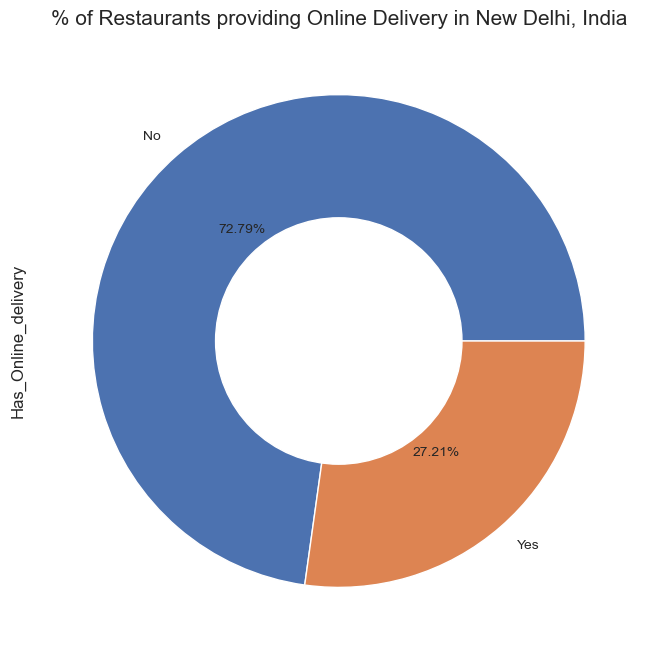

In [133]:
#Q-8: Percentage of restaurants with and without online delivery options in New Delhi 

import matplotlib.pyplot as plt

# Filter for only New Delhi city in India
final_df_delhi = final_df[(final_df['Country'] == 'India') & (final_df['City'] == 'New Delhi')]

# Plot a pie chart for the count of restaurants with and without online delivery options
x = final_df_delhi['Has_Online_delivery'].value_counts().plot(kind='pie', figsize=(10, 8), autopct='%1.2f%%', fontsize=10)

# Define the labels for the pie chart (Yes and No).
labels = ['Yes', 'No']

# Set the title of the pie chart.
plt.title("% of Restaurants providing Online Delivery in New Delhi, India", fontsize=15)

# Draw a white circle in the center of the pie chart to create a donut chart effect.
centre_circle = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Display the pie chart.
plt.show()


* Business Rexommendations: 
    With only 27.21% of restaurants offering online deliveries in New Delhi, expanding into the online delivery market by partnering with food platforms like Uber Eats and Swiggy, and ensuring competitive prices is advisable.

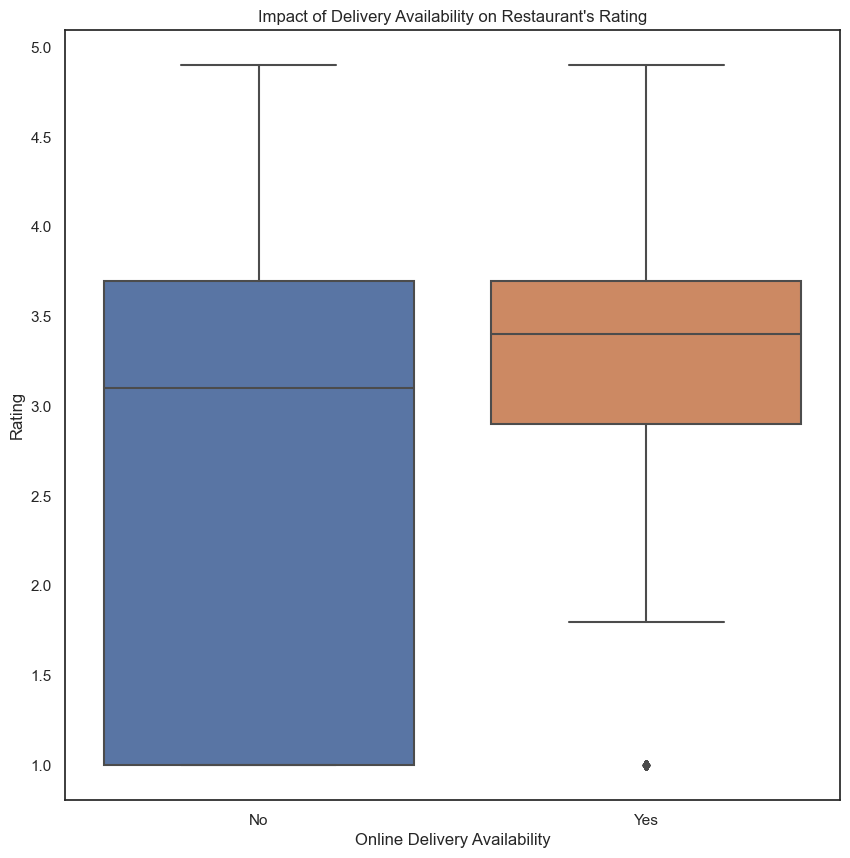

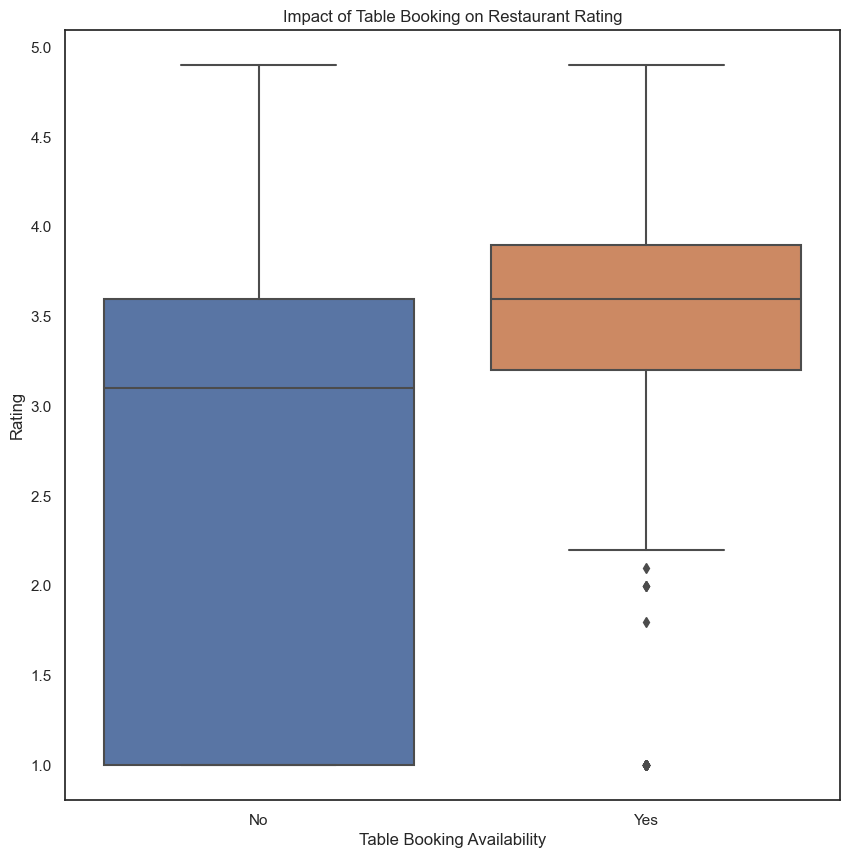


Ratings Summary:
  Delivery Availability  Mean Rating (Delivery)  Median Rating (Delivery)  \
0                    No                2.754310                       3.1   
1                   Yes                3.288005                       3.4   

  Table Booking Availability  Mean Rating (Table Booking)  \
0                         No                     2.809687   
1                        Yes                     3.482556   

   Median Rating (Table Booking)  
0                            3.1  
1                            3.6  


In [134]:
#Q-9: Is the rating of a restaurant affected by it providing a Online order facility or not and Table Booking or not?

# Boxplot for Rating vs Delivery Availability
plt.figure(figsize=(10, 10))
sns.boxplot(x='Has_Online_delivery', y='Rating', data=df)
plt.title("Impact of Delivery Availability on Restaurant's Rating")
plt.xlabel('Online Delivery Availability')
plt.ylabel('Rating')

# Boxplot for Rating vs Table Booking Availability
plt.figure(figsize=(10, 10))
sns.boxplot(x='Has_Table_booking', y='Rating', data=df)
plt.title('Impact of Table Booking on Restaurant Rating')
plt.xlabel('Table Booking Availability')
plt.ylabel('Rating')
plt.show()

# Print label values, mean, median for Online Delivery
label_values_delivery = df['Has_Online_delivery'].unique()
mean_ratings_delivery = df.groupby('Has_Online_delivery')['Rating'].mean()
median_ratings_delivery = df.groupby('Has_Online_delivery')['Rating'].median()

# Print label values, mean, median for Table Booking
label_values_booking = df['Has_Table_booking'].unique()
mean_ratings_booking = df.groupby('Has_Table_booking')['Rating'].mean()
median_ratings_booking = df.groupby('Has_Table_booking')['Rating'].median()


# Create a DataFrame for mean, median ratings for Online Delivery
ratings_summary = pd.DataFrame({
    'Delivery Availability': label_values_delivery,
    'Mean Rating (Delivery)': mean_ratings_delivery.values,
    'Median Rating (Delivery)': median_ratings_delivery.values,
    
# Create a DataFrame for mean, median ratings for Table Booking
    'Table Booking Availability': label_values_booking,
    'Mean Rating (Table Booking)': mean_ratings_booking.values,
    'Median Rating (Table Booking)': median_ratings_booking.values,
    
})

# Print the ratings summary in tabular format
print("\nRatings Summary:")
print(ratings_summary)



* Business Recommendations: 
    Analyzing restaurant ratings reveals that by providing delivery and table booking options enhances customer satisfaction, leading to better reviews and recommendations.

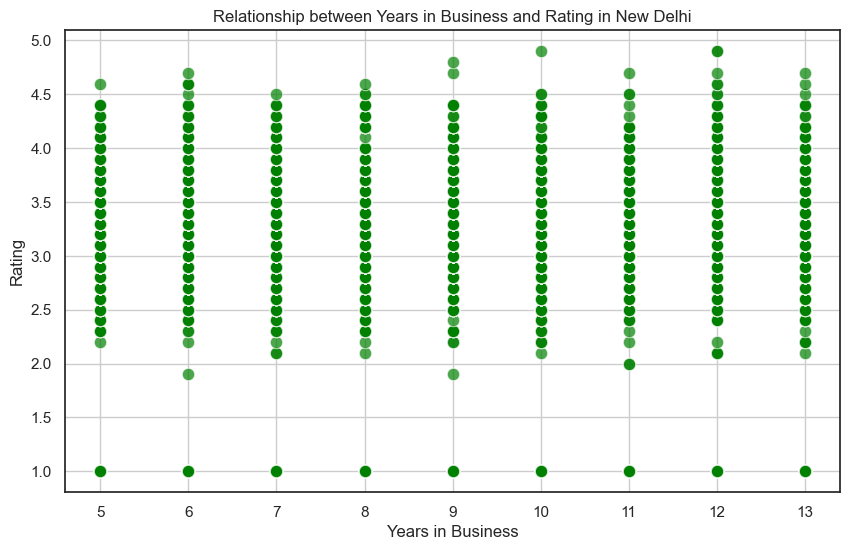

In [136]:
#Q-10: Relationship between Years in Business and Rating in New Delhi

# Filter for only New Delhi city
df_delhi = df[df['City'] == 'New Delhi']

# Scatter plot for Years in Business vs Rating in New Delhi
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Years_in_Business', y='Rating', data=df_delhi, color='green', s=80, alpha=0.7)

plt.title('Relationship between Years in Business and Rating in New Delhi')
plt.xlabel('Years in Business')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

* Business Recommendation: 
    This implies that for a restaurant to achieve a leading position with excellent ratings (above 4.5), a timeframe of five years is required.